[View in Colaboratory](https://colab.research.google.com/github/banka01/ai_ml/blob/master/MNIST.ipynb)

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


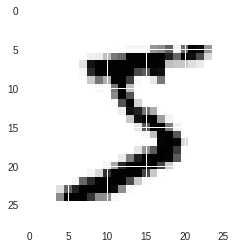

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(10, 1, activation='relu'))
model.add(Conv2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.2186 - acc: 0.9371
Epoch 2/10
57088/60000 [===========================>..] - ETA: 0s - loss: 0.0784 - acc: 0.9765

60000/60000 [==============================] - 19s 320us/step - loss: 0.0779 - acc: 0.9767
Epoch 3/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.0572 - acc: 0.9827
Epoch 4/10
12000/60000 [=====>........................] - ETA: 21s - loss: 0.0419 - acc: 0.9875

60000/60000 [==============================] - 22s 362us/step - loss: 0.0465 - acc: 0.9859
Epoch 5/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0384 - acc: 0.9877
Epoch 6/10
 3584/60000 [>.............................] - ETA: 18s - loss: 0.0258 - acc: 0.9914

60000/60000 [==============================] - 20s 331us/step - loss: 0.0301 - acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.0258 - acc: 0.9913
Epoch 8/10
 1280/60000 [..............................] - ETA: 19s - loss: 0.0224 - acc: 0.9930

60000/60000 [==============================] - 20s 330us/step - loss: 0.0204 - acc: 0.9935
Epoch 9/10
55520/60000 [==========================>...] - ETA: 1s - loss: 0.0169 - acc: 0.9944

60000/60000 [==============================] - 23s 381us/step - loss: 0.0172 - acc: 0.9942
Epoch 10/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.0142 - acc: 0.9951


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.07131071716250008, 0.9823]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.9498542e-16 5.0597536e-17 2.8207927e-11 3.3734384e-08 6.7438066e-19
  4.8383226e-16 8.3615797e-27 1.0000000e+00 5.7056401e-11 1.2959273e-10]
 [1.7422973e-11 5.7478073e-13 1.0000000e+00 2.0276478e-12 9.6567310e-21
  1.6955999e-14 1.7998184e-09 2.7047758e-28 8.2762539e-14 2.6077665e-19]
 [5.5462497e-08 9.9990928e-01 2.4181804e-06 6.5196382e-09 4.8764316e-05
  6.1958709e-09 1.2899070e-09 3.2484687e-07 3.9189243e-05 1.9633190e-10]
 [9.9999988e-01 2.2575159e-17 7.6670183e-08 1.9532750e-12 1.8741571e-14
  4.3036707e-12 7.8162197e-09 3.3298306e-10 5.8525206e-11 7.1499667e-11]
 [2.7488453e-10 2.9814706e-14 2.8923214e-10 2.2212743e-09 9.9999750e-01
  1.4585985e-17 9.6598450e-12 2.7935542e-07 2.2998872e-08 2.2929626e-06]
 [3.0216327e-09 9.9972278e-01 1.3642510e-07 3.0213327e-09 1.2304253e-05
  3.6012186e-11 3.3144106e-11 2.0470277e-04 6.0046972e-05 5.8688288e-10]
 [5.7619787e-17 1.9179795e-11 3.2284092e-08 4.1527125e-11 9.8114496e-01
  1.3770793e-09 1.8871249e-14 2.9826327e-07 1.8539691e-02 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f06066dfba8>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f06067c3e48>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7f060668da90>, 'flatten_1': <keras.layers.core.Flatten object at 0x7f0604668cf8>, 'activation_1': <keras.layers.core.Activation object at 0x7f0604668c50>}


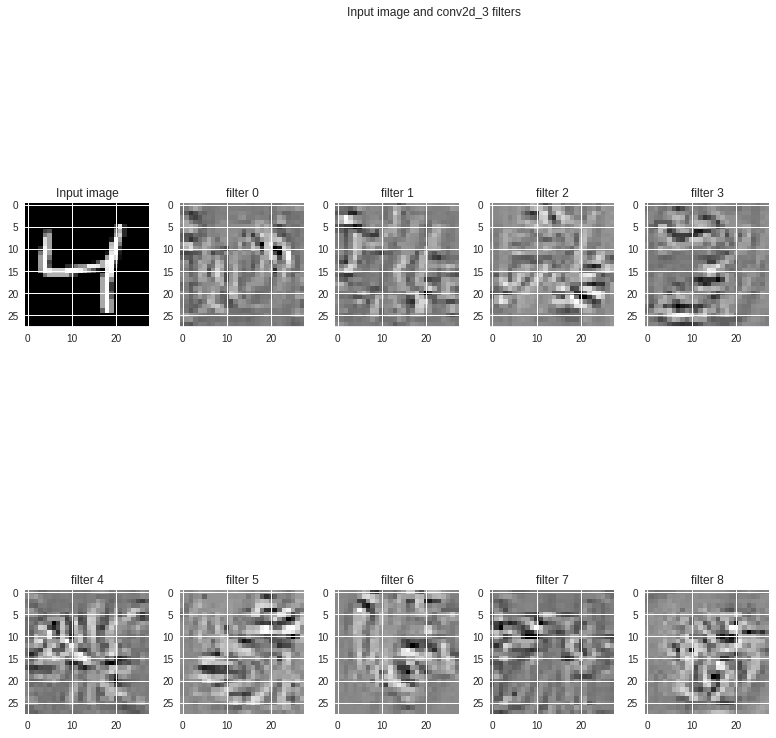

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 2, 5
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()